# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
import numpy as np

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
!pip install kaggle

In [5]:
import os

os.environ['KAGGLE_USERNAME'] = 'vklin357'
os.environ['KAGGLE_KEY'] = '232ec9f34361b961a2bec165d5f73ebd'

!kaggle competitions download -c nyc-taxi-trip-duration

!unzip -o nyc-taxi-trip-duration.zip
!unzip -o train.zip

 96% 82.0M/85.8M [00:00<00:00, 107MB/s]
100% 85.8M/85.8M [00:00<00:00, 104MB/s]
Archive:  nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               
Archive:  train.zip
  inflating: train.csv               


In [6]:
import polars as pl

train_data = pl.read_csv("train.csv")

print(train_data.head())

shape: (5, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ dropoff_d ┆ … ┆ dropoff_l ┆ dropoff_l ┆ store_and ┆ trip_dur │
│ ---       ┆ ---       ┆ tetime    ┆ atetime   ┆   ┆ ongitude  ┆ atitude   ┆ _fwd_flag ┆ ation    │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆ str       ┆ str       ┆   ┆ f64       ┆ f64       ┆ str       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 2016-03-1 ┆ … ┆ -73.96463 ┆ 40.765602 ┆ N         ┆ 455      │
│           ┆           ┆ 4         ┆ 4         ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆ 17:32:30  ┆   ┆           ┆           ┆           ┆          │
│ id2377394 ┆ 1         ┆ 2016-06-1 ┆ 2016-06-1 ┆ … ┆ -73.99948 ┆ 40.731152 

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
train_data = train_data.drop("dropoff_datetime")
train_data = train_data.with_columns(
    pl.col("pickup_datetime").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S")
)

print(train_data.head())

shape: (5, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ dropoff_l ┆ dropoff_l ┆ store_and ┆ trip_dur │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ ongitude  ┆ atitude   ┆ _fwd_flag ┆ ation    │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ f64       ┆ f64       ┆ str       ┆ i64      │
│           ┆           ┆ μs]       ┆           ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ -73.96463 ┆ 40.765602 ┆ N         ┆ 455      │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆           ┆   ┆           ┆           

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

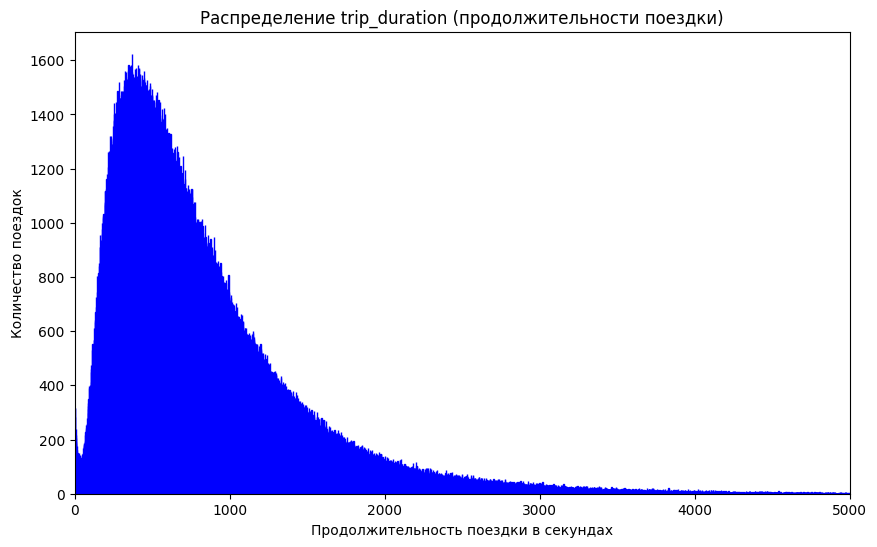

In [8]:
import matplotlib.pyplot as plt

tmp_df = (
    train_data.select(["trip_duration"])
    .group_by("trip_duration")
    .agg(pl.len())
    .sort("trip_duration")
)

plt.figure(figsize=(10, 6))
plt.bar(tmp_df["trip_duration"], tmp_df["len"], color='blue', edgecolor='blue')
plt.title('Распределение trip_duration (продолжительности поездки)')
plt.xlabel('Продолжительность поездки в секундах')
plt.ylabel('Количество поездок')
plt.xlim(0, 5000)
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Наибольшее количество поездок длится около 200–1000 секунд (примерно 3-17 минут). Этот пик соответствует обычным поездкам, которые совершаются в городе и занимают относительно короткое время. Большинство поездок занимают небольшое количество времени, но есть небольшая часть поездок с очень большой длительностью. Распределение смещено влево и имеет длинный "хвост" вправо, из-за наличия поездок с очень длительной продолжительностью. Это признак экспоненциального или логнормального распределения. Это можно исправить с помощью логарифмического преобразования, которое может помочь в нормализации данных и улучшить качество моделей, таких как линейная регрессия.
Также можно использовать удаление выбросов или их ограничение на уровне, который имеет смысл для анализа, это может помочь улучшить прогнозирование.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE подоходит для данных, где целевая переменная и прогноз неотрицательны (то есть как в нашей задаче). За счет логарифмирования ответов мы больше штрафуем за отклонение в порядке величин (те. за относительные ошибки), а не в их значения. Это важно поскольку как мы видим порядок целевой переменной значимо влияет на распределение. То есть логарифмирование помогает сгладить большие значения и уменьшить влияние выбросов, большие ошибки при больших значениях будут не так сильно увеличивать ошибку, как в метрике RMSE.

Также стоит отметить что логарифмическая функция потерь не симметрична. Это значит, что модель сильнее штрафуется за занижение прогнозов, чем за завышение. Это может быть полезно в нашей задаче поскольку лучше завысить прогноз длительности поездки, чем занизить его.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

###1. RMSLE

Формула RMSLE выглядит следующим образом:
$$
\text{RMSLE}(y, a) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(a(x_i) + 1) \right)^2}
$$
Где:
- $ y_i $ — истинное значение целевой переменной.
- $ a(x_i) $ — предсказанное значение модели для $x_i$.
- $n$ — количество наблюдений.

###2. Определим модифицированные переменные

Теперь предположим, что:
- Мы будем работать с модифицированной целевой переменной $ \hat{y}_i = \log(y_i + 1) $.
- Модель предсказывает $ \hat{a}(x_i)$ — значение для логарифма целевой переменной, то есть предсказывает $ \hat{a}(x_i) \approx \hat{y}_i $.

Зная это, предсказанное исходное значение можно восстановить с помощью обратного логарифма:
$$
a(x_i) = \exp(\hat{a}(x_i)) - 1
$$

###3. RMSLE через предсказание логарифма

Подставим это в выражение для RMSLE:
$$
\text{RMSLE}(y, a) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(\exp(\hat{a}(x_i)) - 1 + 1) \right)^2}
$$

Упростим выражение:
$$
\text{RMSLE}(y, a) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \hat{a}(x_i) \right)^2}
$$

Здесь видно, что логарифм истинного значения $ \log(y_i + 1) $ — это наша модифицированная целевая переменная $ \hat{y}_i $, а $ \hat{a}(x_i) $ — это предсказанное значение для логарифма:
$$
\text{RMSLE}(y, a) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}_i - \hat{a}(x_i) \right)^2}
$$

###4. RMSLE эквивалентно MSE для логарифмов

Теперь видно, что это выражение — это просто среднеквадратичная ошибка (MSE) между истинными и предсказанными логарифмами:
$$
\text{MSE}(\hat{y}, \hat{a}) = \frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}_i - \hat{a}(x_i) \right)^2
$$

###Вывод

Таким образом, оптимизация RMSLE для исходной модели $a(x_i)$ эквивалентна оптимизации MSE для логарифмической модели $ \hat{a}(x_i) $. Это объясняется тем, что RMSLE сравнивает логарифмы истинных и предсказанных значений, что сводится к минимизации среднеквадратичной ошибки между логарифмами этих значений.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

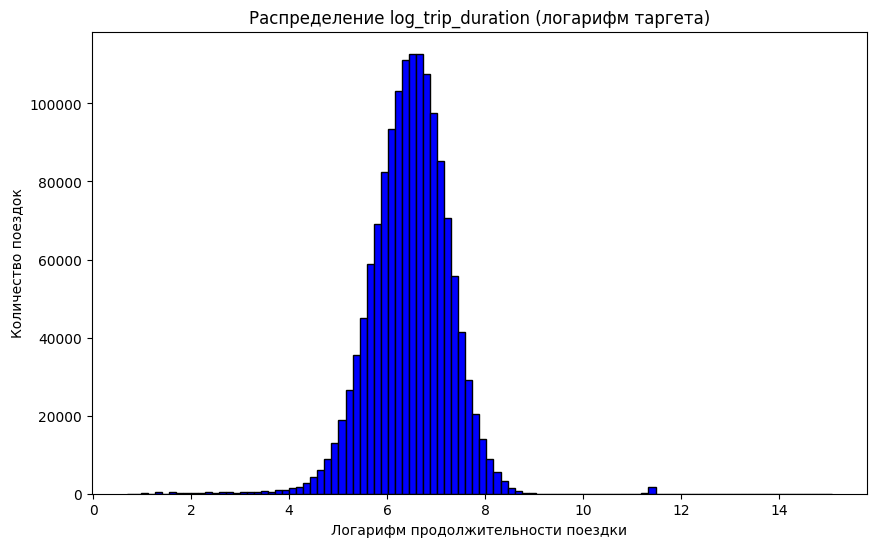

In [9]:
train_data = train_data.with_columns(
    pl.col("trip_duration").log1p().alias("log_trip_duration")
)

train_data = train_data.drop("trip_duration")
log_trip_duration = train_data["log_trip_duration"]

plt.figure(figsize=(10, 6))
plt.hist(log_trip_duration, bins=100, color='blue', edgecolor='black')
plt.title('Распределение log_trip_duration (логарифм таргета)')
plt.xlabel('Логарифм продолжительности поездки')
plt.ylabel('Количество поездок')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [10]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

log1p_y_true = log_trip_duration.to_numpy()
log1p_y_pred = np.full_like(log1p_y_true, np.mean(log1p_y_true))

rmsle_best_const = rmsle(log1p_y_true, log1p_y_pred)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

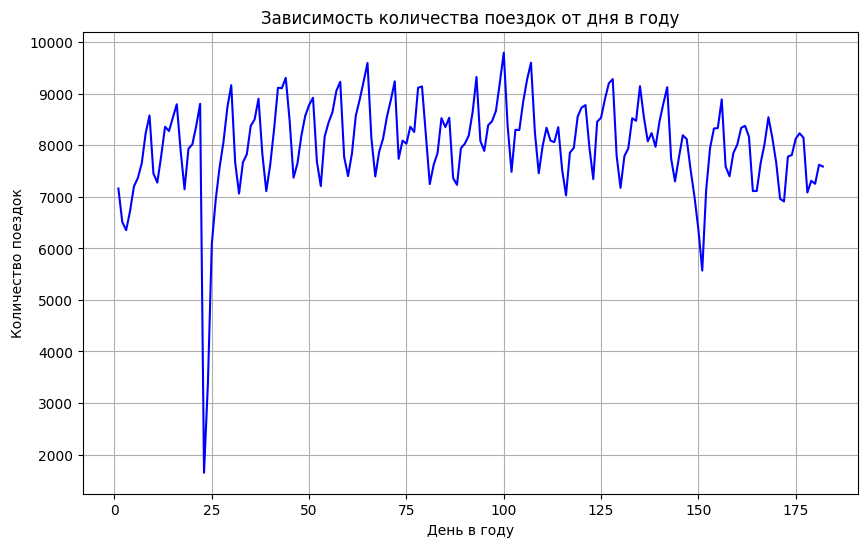

In [11]:
daily_trips = train_data.with_columns(
    pl.col("pickup_datetime").dt.ordinal_day().alias("day_of_year")
)

daily_trips = daily_trips.group_by("day_of_year").agg(pl.count("day_of_year").alias("num_trips"))
daily_trips = daily_trips.sort("day_of_year")

plt.figure(figsize=(10, 6))
plt.plot(daily_trips["day_of_year"], daily_trips["num_trips"], color='blue')
plt.title('Зависимость количества поездок от дня в году')
plt.xlabel('День в году')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.



Для того чтобы выяснить что происходило в аномальне периоды в Нью Йорке сперва определим год событий:

In [12]:
years = train_data.select(pl.col("pickup_datetime").dt.year().unique())
print(years)

shape: (1, 1)
┌─────────────────┐
│ pickup_datetime │
│ ---             │
│ i32             │
╞═════════════════╡
│ 2016            │
└─────────────────┘


Теперь выведем первые пять дней с самым минимальным количеством поездок. (то есть выясним даты этих аномальных скачков вниз)

In [13]:
anomalous_days = daily_trips.sort("num_trips").head(5)
anomalous_days_pandas = anomalous_days
print(anomalous_days_pandas)

shape: (5, 2)
┌─────────────┬───────────┐
│ day_of_year ┆ num_trips │
│ ---         ┆ ---       │
│ i16         ┆ u32       │
╞═════════════╪═══════════╡
│ 23          ┆ 1648      │
│ 24          ┆ 3383      │
│ 151         ┆ 5570      │
│ 25          ┆ 6084      │
│ 3           ┆ 6353      │
└─────────────┴───────────┘



Как мы видим 2 аномальных периода низкой загруженности такси приходится на 23, 24 день года (то есть 23 и 24 января) и на 151 день (второй скачок) 30 мая.

Если поискать в Гугл то можем узнать что 23, 24 января 2016 года в Нью Йорке произошла одна из самых сильных снежных бурь в истории города — "Blizzard 2016". В этот период многие пытались воздержаться от поездок на автомобилях: https://ria.ru/20160123/1364032228.html.

30 мая 2016 года в Нью Йорке праздновался День памяти во время которого некоторые улицы перекрываются для парадов, также в этот день произошла перестрелка в районе Бруклина что тоже могло повлиять на загруженность такси.https://tass.ru/proisshestviya/3324970.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

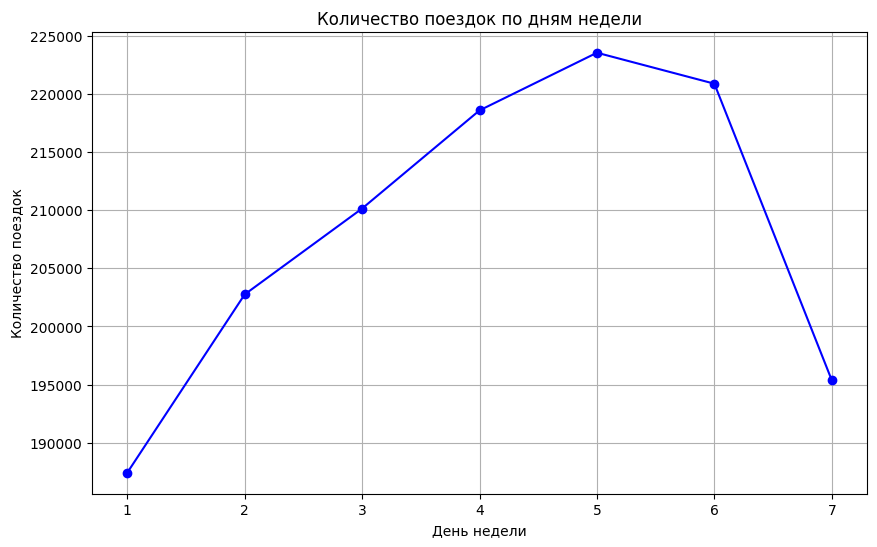

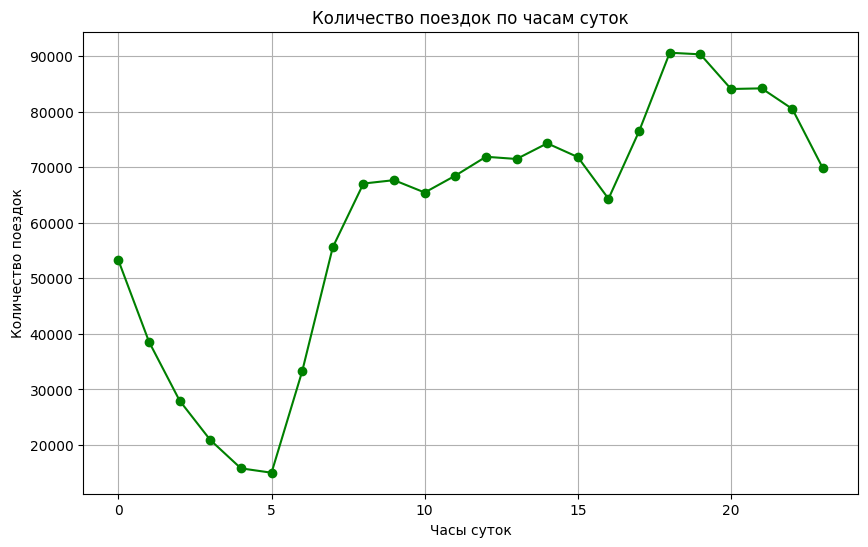

In [14]:
trips = train_data.with_columns([
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.hour().alias("hour")
])

trips_by_weekday = trips.group_by("weekday").agg(pl.count("weekday").alias("num_by_weekday")).sort("weekday")

plt.figure(figsize=(10, 6))
plt.plot(trips_by_weekday["weekday"], trips_by_weekday["num_by_weekday"], marker='o', color='blue')
plt.title('Количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

trips_by_hour = trips.group_by("hour").agg(pl.count("hour").alias("num_by_hour")).sort("hour")

plt.figure(figsize=(10, 6))
plt.plot(trips_by_hour["hour"], trips_by_hour["num_by_hour"], marker='o', color='green')
plt.title('Количество поездок по часам суток')
plt.xlabel('Часы суток')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

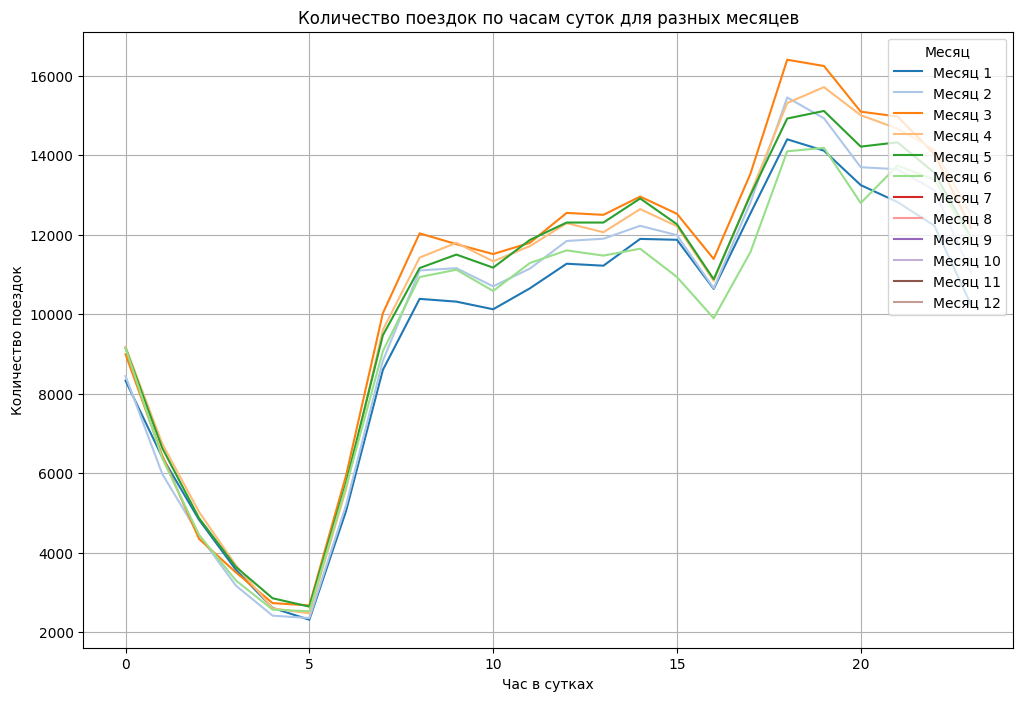

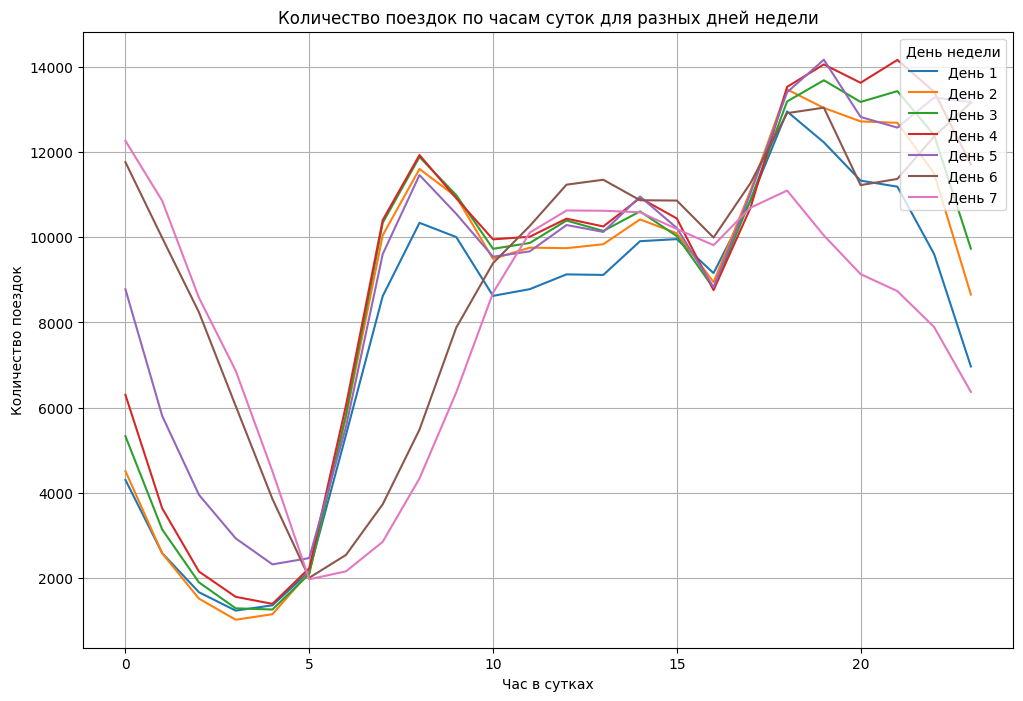

In [15]:
cnt_data = train_data.with_columns([
    pl.col("pickup_datetime").dt.month().alias("month"),
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.hour().alias("hour")
])

month_colors = plt.colormaps['tab20']
weekday_colors = plt.colormaps['tab10']

plt.figure(figsize=(12, 8))

for month in range(1, 13):
    trips_by_hour_month = cnt_data.filter(pl.col("month") == month) \
        .group_by("hour") \
        .agg(pl.count("hour").alias("num_trips")) \
        .sort("hour")

    hours = trips_by_hour_month["hour"].to_numpy()
    num_trips = trips_by_hour_month["num_trips"].to_numpy()
    plt.plot(hours, num_trips, label=f"Месяц {month}", color=month_colors(month - 1))

plt.title('Количество поездок по часам суток для разных месяцев')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.legend(title="Месяц", loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

for weekday in range(1, 8):
    trips_by_hour_weekday = cnt_data.filter(pl.col("weekday") == weekday) \
        .group_by("hour") \
        .agg(pl.count("hour").alias("num_trips")) \
        .sort("hour")

    hours = trips_by_hour_weekday["hour"].to_numpy()
    num_trips = trips_by_hour_weekday["num_trips"].to_numpy()
    plt.plot(hours, num_trips, label=f"День {weekday}", color=weekday_colors(weekday - 1))

plt.title('Количество поездок по часам суток для разных дней недели')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.legend(title="День недели", loc='upper right')
plt.grid(True)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?



###Выделяются ли какие-нибудь дни недели?

Посмотрев на второй график мы видим что наиболее выделяются 6 и 7 день недели (суббота и воскресенье) в эти дни наблюдается наибольший трафик в ночные часы с 0 до 5 среди всех остальных дней недели (вероятно это говорит об активной "ночной жизни" в выходные), также эти дни отличаются наименьшей нагрузкой в утренние часы с 5 до 10 по причине того что людям не надо ехать на работу. В воскресенье также наблюдается самая низкая загруженность с 17 до 22 (час-пик) отностительно других дней.

###Время суток

Самые пиковые часы поездок приходятся на будние дни с 17 до 22 (час-пик) и и утренние часы с 8 до 10 (это время когда люди едут и уезжают с работы).

Самые малое количество поездок приходится на ночные часы будних дней с 0 до 5 потому что люди спят.

###Выделяются ли какие-нибудь месяца?

Изучив первый график мы не наблюдаем серьезных отличий по месяцам, и все же можем заметить что январь и июнь - месяцы с самой низкой загруженностью такси. Вероятно причиной является то, что в это время люди обычно улетают в отпуска.
Самыми пиковыми месяцами являются март и апрель.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

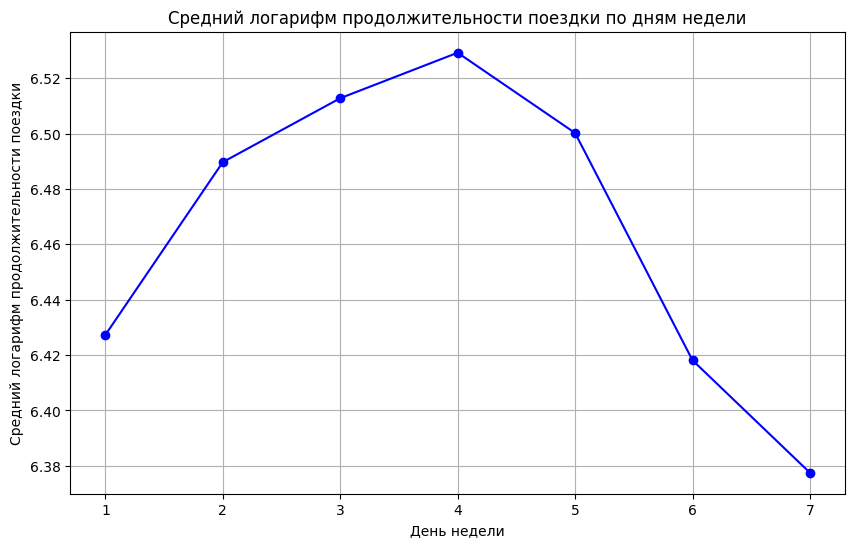

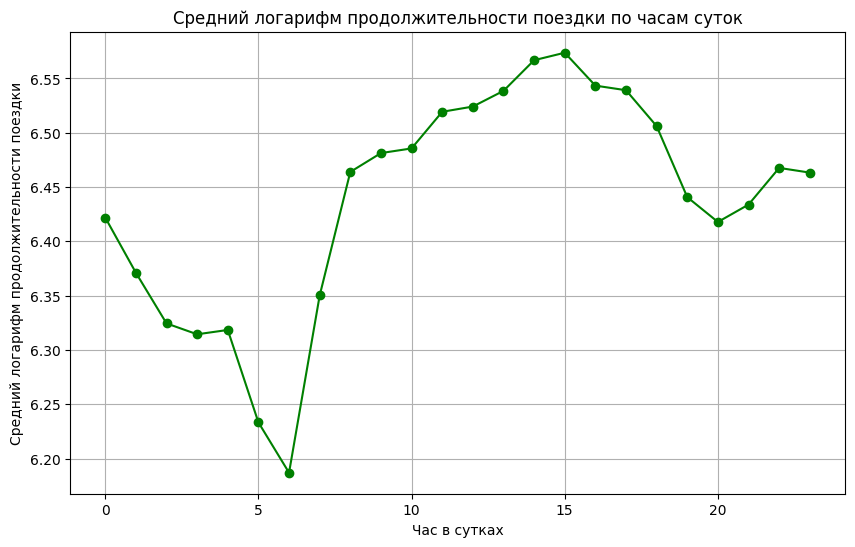

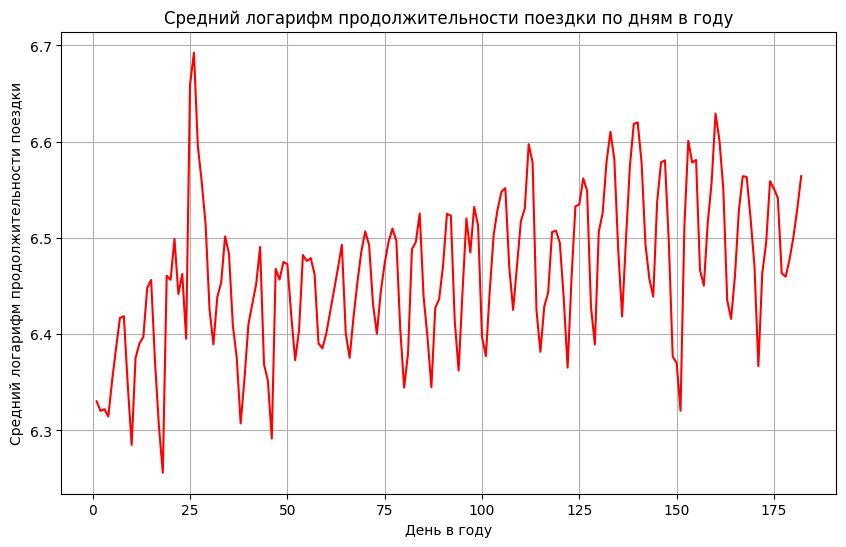

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_data, test_size=0.3, random_state=10)

data = train.with_columns([
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day_of_year")
])

weekday_avg = data.group_by("weekday").agg(
    pl.mean("log_trip_duration").alias("avg_log_trip_duration")
).sort("weekday")

plt.figure(figsize=(10, 6))
plt.plot(weekday_avg["weekday"], weekday_avg["avg_log_trip_duration"], marker='o', color='blue')
plt.title('Средний логарифм продолжительности поездки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм продолжительности поездки')
plt.grid(True)
plt.show()

hour_avg = data.group_by("hour").agg(
    pl.mean("log_trip_duration").alias("avg_log_trip_duration")
).sort("hour")

plt.figure(figsize=(10, 6))
plt.plot(hour_avg["hour"], hour_avg["avg_log_trip_duration"], marker='o', color='green')
plt.title('Средний логарифм продолжительности поездки по часам суток')
plt.xlabel('Час в сутках')
plt.ylabel('Средний логарифм продолжительности поездки')
plt.grid(True)
plt.show()

day_of_year_avg = data.group_by("day_of_year").agg(
    pl.mean("log_trip_duration").alias("avg_log_trip_duration")
).sort("day_of_year")

plt.figure(figsize=(10, 6))
plt.plot(day_of_year_avg["day_of_year"], day_of_year_avg["avg_log_trip_duration"], color='red')
plt.title('Средний логарифм продолжительности поездки по дням в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм продолжительности поездки')
plt.grid(True)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

####Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок?

Да, графики таргета похожи на аналогичные графики количества поездок хоть и есть незначительные смещения (что конечно же допустимо).

Пик среднего логарифма продолжительности поездки приходится на будние дни (наибольшее значение в четверг), а минимальное значение на выходные дни (воскресенье).

В формате часов суток пик таргета приходится с 10 до 17 (дневные часы) в то время как минимум на ночь и раннее утро.

Причина схожести графиков заключается в том, что количество поездок и длительность поездок одинаково зависят от рабочих дней, часов-пик, а также от активности людей в выходные дни, поэтому можно сказать что длительность поездки (почти) прямо пропорциональна количеству поездок в это время. Когда количество поездок велико, например, в будние дни утром и вечером, среднее время поездки тоже растет, поскольку появляется большое скопление машин, аварии, пробки, следовательно и поездки начинают занимать больше времени.

####Что происходит со средним таргетом в те два аномальных периода, что мы видели выше?

Первый аномальный период:

В этот период несмотря на резкое сокращения количества поездок сильно выросла продолжительность поездки. Это связано с тем что те немногочисленные поездки на такси которые все же совершались были очень долгими по причине сильной снежной бури.

Второй аномальный период:

Здесь мы наблюдаем что вместе с падением количества поездок падает и их продолжительность. Это происходит потому что в этот период в городе проходил праздник и центральные улицы были перекрыты для парада, то есть людям не надо было ехать на работу а также нельзя было проехать в центр города поэтому количество (обычно долгих) поездок из окраин в центр сократилось а за ним и длительность поездок.

####Наблюдаете ли вы какой-нибудь тренд на графике зависимости log_trip_duration от номера дня в году?

Да, наблюдаю.

Во первых, на графике видны постоянные колебания вверх вниз это связано с различной активностью такси в будние и выходные дни.

Во вторых, мы можем заметить тренд на постепенное повышение среднего логарифма времени поездки в течение всех (около) 180 дней. Это говорит о том что с наступлением теплых месяцев растет продолжительность поездок (как и их количество что было выявлено ранее).

В третьих, незначительно растет и амплитуда колебаний, что вероятнее всего также связано с возросшей активностью на дорогах в будние дни.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [17]:
train_data = train_data.with_columns([
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.month().alias("month"),
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day_of_year"),

    (pl.col("pickup_datetime").dt.ordinal_day().is_between(20, 30)).cast(pl.Int8).alias("anomal_period_1"),
    (pl.col("pickup_datetime").dt.ordinal_day().is_between(145, 155)).cast(pl.Int8).alias("anomal_period_2")
])

train = train.with_columns([
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.month().alias("month"),
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day_of_year"),

    (pl.col("pickup_datetime").dt.ordinal_day().is_between(20, 30)).cast(pl.Int8).alias("anomal_period_1"),
    (pl.col("pickup_datetime").dt.ordinal_day().is_between(145, 155)).cast(pl.Int8).alias("anomal_period_2")
])

test = train.with_columns([
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.month().alias("month"),
    pl.col("pickup_datetime").dt.hour().alias("hour"),
    pl.col("pickup_datetime").dt.ordinal_day().alias("day_of_year"),

    (pl.col("pickup_datetime").dt.ordinal_day().is_between(20, 30)).cast(pl.Int8).alias("anomal_period_1"),
    (pl.col("pickup_datetime").dt.ordinal_day().is_between(145, 155)).cast(pl.Int8).alias("anomal_period_2")
])

print(train.select(["pickup_datetime", "weekday", "month", "hour", "day_of_year", "anomal_period_1", "anomal_period_2"]))

shape: (1_021_050, 7)
┌─────────────────────┬─────────┬───────┬──────┬─────────────┬─────────────────┬─────────────────┐
│ pickup_datetime     ┆ weekday ┆ month ┆ hour ┆ day_of_year ┆ anomal_period_1 ┆ anomal_period_2 │
│ ---                 ┆ ---     ┆ ---   ┆ ---  ┆ ---         ┆ ---             ┆ ---             │
│ datetime[μs]        ┆ i8      ┆ i8    ┆ i8   ┆ i16         ┆ i8              ┆ i8              │
╞═════════════════════╪═════════╪═══════╪══════╪═════════════╪═════════════════╪═════════════════╡
│ 2016-03-27 00:25:29 ┆ 7       ┆ 3     ┆ 0    ┆ 87          ┆ 0               ┆ 0               │
│ 2016-03-18 20:44:12 ┆ 5       ┆ 3     ┆ 20   ┆ 78          ┆ 0               ┆ 0               │
│ 2016-04-15 18:26:12 ┆ 5       ┆ 4     ┆ 18   ┆ 106         ┆ 0               ┆ 0               │
│ 2016-03-24 14:28:34 ┆ 4       ┆ 3     ┆ 14   ┆ 84          ┆ 0               ┆ 0               │
│ 2016-04-28 13:53:52 ┆ 4       ┆ 4     ┆ 13   ┆ 119         ┆ 0               ┆ 0     

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальный признак отличается от числового тем, что он может принимать ограниченное множество значений, а также представляет собой категорию который не имеет числового смысла. Значения категориального признака нельзя сравнивать, складывать или вычитать.
Поэтому все рассматриваемые нами признаки относятся к категориальным.

weekday:
ограниченное множество, невозможно численно сравнить.

month:
ограниченное множество, невозможно численно сравнить.

hour:
ограниченное множество, невозможно численно сравнить.

anomal_period_1\2: бинарные признаки, делят выборку на два класса, поэтому тоже категориальные.


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x_train = train[['weekday', 'month', 'hour', 'day_of_year', 'anomal_period_1', 'anomal_period_2']]
y_train = train['log_trip_duration']
x_test = test[['weekday', 'month', 'hour', 'day_of_year', 'anomal_period_1', 'anomal_period_2']]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer([
    ('encode_categorical', OneHotEncoder(), x_train.columns),
    ('scaler', StandardScaler(), [])
])

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', Ridge())
])

model_pipeline.fit(x_train, y_train)

predicted_train = model_pipeline.predict(x_train)
predicted_test = model_pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

rmsle_train = calculate_rmsle(y_train, predicted_train)
rmsle_test = calculate_rmsle(y_test, predicted_test)

print("RMSLE на обучающей выборке:", rmsle_train)
print("RMSLE на тестовой выборке:", rmsle_test)

print("RMSLE для константного предсказания:", rmsle_best_const) #0.7957592365411509

RMSLE на обучающей выборке: 0.788235020095388
RMSLE на тестовой выборке: 0.788235020095388
RMSLE для константного предсказания: 0.7957592365411509


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [19]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [20]:
def get_sample_coordinates(df: pl.DataFrame, n: int = 1000):
    sample_df = df.sample(n)
    latitude_values = sample_df["pickup_latitude"].to_list()
    longitude_values = sample_df["pickup_longitude"].to_list()
    return latitude_values, longitude_values

your_lat_values, your_lon_values = get_sample_coordinates(train_data)

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

На данной карте прежде всего выделяются скопления точек в двух аэропортах Нью-Йорка: аэропорт имени Джона Кеннеди и Ла Гуардия.

Я выбрал скопления в местах аэропортов поскольку они находятся далеко от центра города и имеют высокую загруженность и значимость для задачи, так как в аэропортах всегда есть большая востребованность в такси.

Эти два скопления отличаются большим расстоянием от центра, из чего следует большое расстояние поездок в этом пункте а значит и их продолжительность. Также показатели в данных скоплениях сильно зависят от деятельности аэропортов: их загруженности (например, в сезон отпусков), времени авиа-рейсов и погодных условий. Это важно учитывать в нашей задаче.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [21]:
!pip install haversine

In [22]:
from haversine import haversine, Unit

distances = []

for row in train_data.to_dicts():
    distance = haversine(
        (row["pickup_latitude"], row["pickup_longitude"]),
        (row["dropoff_latitude"], row["dropoff_longitude"]),
        unit=Unit.KILOMETERS
    )
    distances.append(distance)

train_data = train_data.with_columns(pl.Series("haversine", distances))
print(train_data)

shape: (1_458_644, 17)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ day_of_ye ┆ anomal_pe ┆ anomal_pe ┆ haversin │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ ar        ┆ riod_1    ┆ riod_2    ┆ e        │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ i16       ┆ i8        ┆ i8        ┆ f64      │
│           ┆           ┆ μs]       ┆           ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ 74        ┆ 0         ┆ 0         ┆ 1.498523 │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆           ┆   ┆           ┆   

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [23]:
train_data = train_data.with_columns(
    pl.col("haversine").log1p().alias("log_haversine")
)

print(train_data)

shape: (1_458_644, 18)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ id        ┆ vendor_id ┆ pickup_da ┆ passenger ┆ … ┆ anomal_pe ┆ anomal_pe ┆ haversine ┆ log_have │
│ ---       ┆ ---       ┆ tetime    ┆ _count    ┆   ┆ riod_1    ┆ riod_2    ┆ ---       ┆ rsine    │
│ str       ┆ i64       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ f64       ┆ ---      │
│           ┆           ┆ datetime[ ┆ i64       ┆   ┆ i8        ┆ i8        ┆           ┆ f64      │
│           ┆           ┆ μs]       ┆           ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ id2875421 ┆ 2         ┆ 2016-03-1 ┆ 1         ┆ … ┆ 0         ┆ 0         ┆ 1.498523  ┆ 0.9157   │
│           ┆           ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 17:24:55  ┆           ┆   ┆           ┆   

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [24]:
correlation_distance = train_data.select(
    pl.corr("haversine", "log_trip_duration")
).to_numpy()[0][0]

correlation_log_distance = train_data.select(
    pl.corr("log_haversine", "log_trip_duration")
).to_numpy()[0][0]

print(f"Корреляция между расстоянием и таргетом: {correlation_distance}")
print(f"Корреляция между логарифмом расстояния и таргетом: {correlation_log_distance}")

Корреляция между расстоянием и таргетом: 0.5735948311180089
Корреляция между логарифмом расстояния и таргетом: 0.749882262889781


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

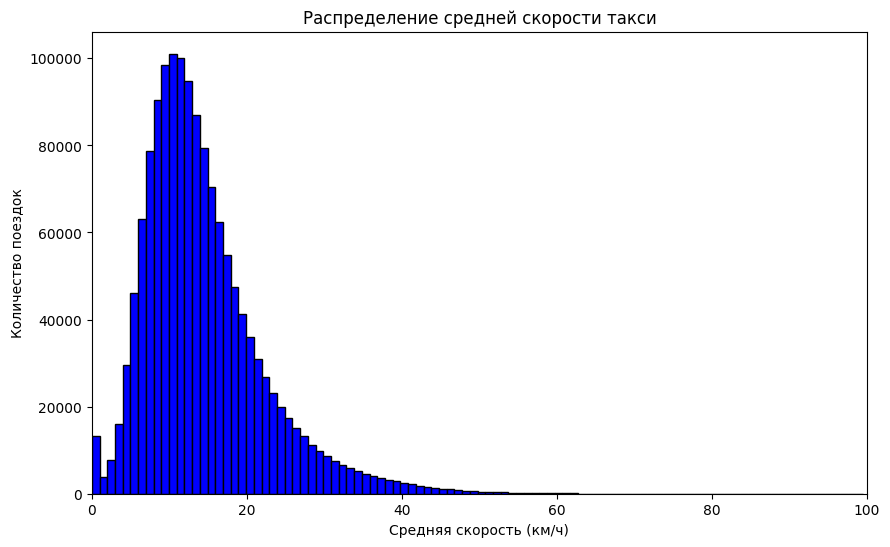

In [25]:
train_data = train_data.with_columns(
    (pl.col("log_trip_duration").exp() - 1).alias("trip_duration")
)

train_data = train_data.with_columns(
    (pl.col("haversine") / pl.col("trip_duration") * 3600).alias("average_speed")
)

average_speed = train_data["average_speed"].to_numpy()

filtered_speed = average_speed[average_speed < 100]

plt.figure(figsize=(10, 6))
plt.hist(filtered_speed, bins=100, color='blue', edgecolor='black')
plt.title('Распределение средней скорости такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Количество поездок')
plt.xlim(0, 100)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

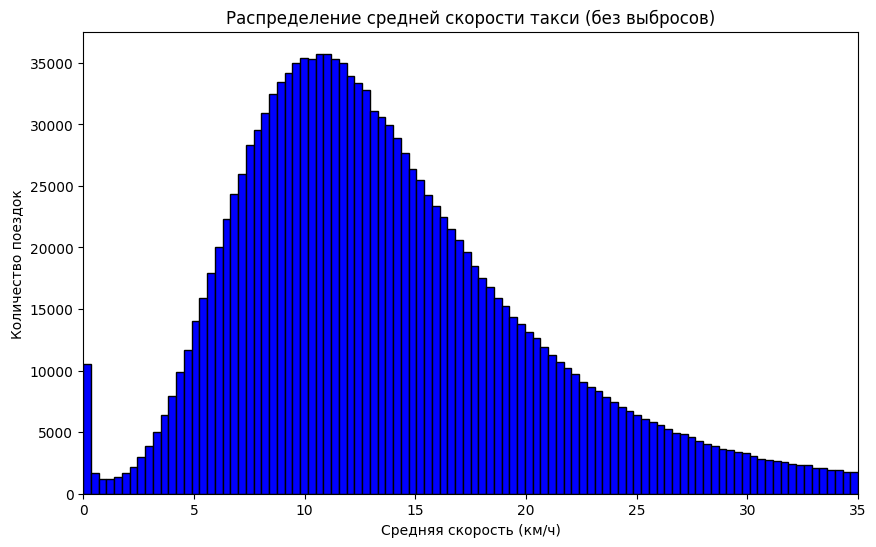

In [26]:
reasonable_speed = average_speed[average_speed < 35]

plt.figure(figsize=(10, 6))
plt.hist(reasonable_speed, bins=100, color='blue', edgecolor='black')
plt.title('Распределение средней скорости такси (без выбросов)')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Количество поездок')
plt.xlim(0, 35)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

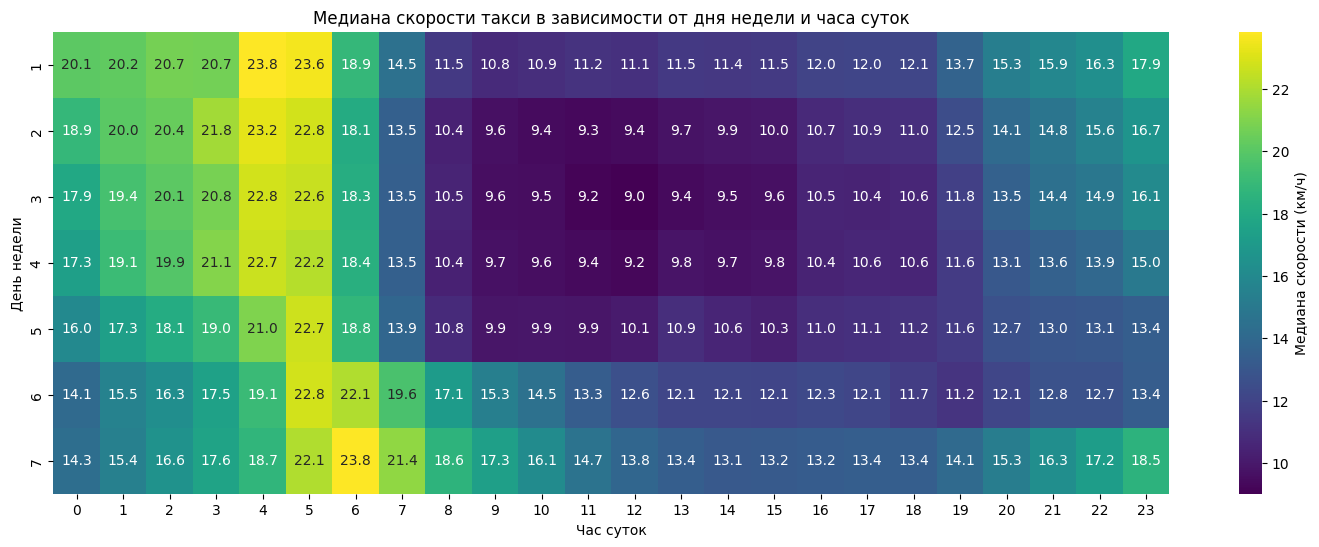

In [27]:
import seaborn as sns

median_speed = train_data.with_columns([
    pl.col("pickup_datetime").dt.weekday().alias("weekday"),
    pl.col("pickup_datetime").dt.hour().alias("hour")
])

median_speed = (
    median_speed
    .group_by(["weekday", "hour"])
    .agg(pl.median("average_speed").alias("median_speed"))
)

median_speed_pandas = median_speed.to_pandas()
median_speed_pivot = median_speed_pandas.pivot(index="weekday", columns="hour", values="median_speed")

plt.figure(figsize=(18, 6))
sns.heatmap(median_speed_pivot, cmap="viridis", annot=True, fmt=".1f", cbar_kws={'label': 'Медиана скорости (км/ч)'})
plt.title("Медиана скорости такси в зависимости от дня недели и часа суток")
plt.xlabel("Час суток")
plt.ylabel("День недели")
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Значение средней скорости нельзя использовать в обучении, так как это производный признак, который напрямую зависит от целевой переменной — времени поездки (trip_duration). Нельзя использовать целевую переменную при создании признаков, поскольку это создаёт утечку данных.

In [28]:
train_data = train_data.drop("average_speed")

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Минимальная скорость приходится на дневное время, примерно с 8 до 18 часов, в будние дни. Это время совпадает с периодами максимальной загруженности на дорогах, такими как утренние часы пик и рабочее время. В выходные в это время скорости выше что говорит о меньшей загрузке так как людям не надо ехать на работу.

Максимальная скорость достигается ранним утром, с 4 до 6 часов, когда на дорогах минимальное количество автомобилей, меньше пробок. При этом некоторые люди пытаются как можно раньше доехать до работы чтобы избежать утреннего часа-пик. В выходные этот пик сдвигается на поздние часы поскольку нагрузка в час-пик в выходные дни не такая большая.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [29]:
train_data = train_data.with_columns([
    pl.when(
        ((pl.col("pickup_datetime").dt.weekday().is_in([1, 2, 3, 4, 5])) &
         (pl.col("pickup_datetime").dt.hour().is_in([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])))
    ).then(1).otherwise(0).alias("max_traffic"),

    pl.when(
        (((pl.col("pickup_datetime").dt.weekday().is_in([1, 2, 3, 4, 5])) &
         (pl.col("pickup_datetime").dt.hour().is_in([3, 4, 5]))) |
         ((pl.col("pickup_datetime").dt.weekday().is_in([6, 7])) &
         (pl.col("pickup_datetime").dt.hour().is_in([5, 6, 7]))))
    ).then(1).otherwise(0).alias("min_traffic")
])

print(train_data.select(["pickup_datetime", "max_traffic", "min_traffic"]))

shape: (1_458_644, 3)
┌─────────────────────┬─────────────┬─────────────┐
│ pickup_datetime     ┆ max_traffic ┆ min_traffic │
│ ---                 ┆ ---         ┆ ---         │
│ datetime[μs]        ┆ i32         ┆ i32         │
╞═════════════════════╪═════════════╪═════════════╡
│ 2016-03-14 17:24:55 ┆ 1           ┆ 0           │
│ 2016-06-12 00:43:35 ┆ 0           ┆ 0           │
│ 2016-01-19 11:35:24 ┆ 1           ┆ 0           │
│ 2016-04-06 19:32:31 ┆ 0           ┆ 0           │
│ 2016-03-26 13:30:55 ┆ 0           ┆ 0           │
│ …                   ┆ …           ┆ …           │
│ 2016-04-08 13:31:04 ┆ 1           ┆ 0           │
│ 2016-01-10 07:35:15 ┆ 0           ┆ 1           │
│ 2016-04-22 06:57:41 ┆ 0           ┆ 0           │
│ 2016-01-05 15:56:26 ┆ 1           ┆ 0           │
│ 2016-04-05 14:44:25 ┆ 1           ┆ 0           │
└─────────────────────┴─────────────┴─────────────┘


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Эти признаки могут быть полезны потому что аэропорты находятся далеко от центра города из за этого расстояние и продолжительность поездок будут больше чем у основного количества поездок в городе. На аэропорты всегда приходится значительная часть такси перевозок в каждом городе. Также активность такси в этих зонах зависит от работы аэропортов. Все эти особенности сильно влияют на наши данные, поэтому мы должны учитывать их с помощью отдельных признаков.

In [30]:
jfk_coords = (40.6413, -73.7781)
lga_coords = (40.7769, -73.8740)
radius_km = 2

pickup_coords = train_data.select(["pickup_latitude", "pickup_longitude"]).to_numpy()
dropoff_coords = train_data.select(["dropoff_latitude", "dropoff_longitude"]).to_numpy()

pickup_jfk = np.array([haversine(jfk_coords, coord, unit=Unit.KILOMETERS) for coord in pickup_coords]) < radius_km
dropoff_jfk = np.array([haversine(jfk_coords, coord, unit=Unit.KILOMETERS) for coord in dropoff_coords]) < radius_km

pickup_lga = np.array([haversine(lga_coords, coord, unit=Unit.KILOMETERS) for coord in pickup_coords]) < radius_km
dropoff_lga = np.array([haversine(lga_coords, coord, unit=Unit.KILOMETERS) for coord in dropoff_coords]) < radius_km

train_data = train_data.with_columns([
    pl.Series("pickup_jfk", pickup_jfk),
    pl.Series("dropoff_jfk", dropoff_jfk),
    pl.Series("pickup_lga", pickup_lga),
    pl.Series("dropoff_lga", dropoff_lga),
])
print(train_data.select(["pickup_jfk", "dropoff_jfk", "pickup_lga", "dropoff_lga"]))

shape: (1_458_644, 4)
┌────────────┬─────────────┬────────────┬─────────────┐
│ pickup_jfk ┆ dropoff_jfk ┆ pickup_lga ┆ dropoff_lga │
│ ---        ┆ ---         ┆ ---        ┆ ---         │
│ bool       ┆ bool        ┆ bool       ┆ bool        │
╞════════════╪═════════════╪════════════╪═════════════╡
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ …          ┆ …           ┆ …          ┆ …           │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
│ false      ┆ false       ┆ false      ┆ false       │
└────────────┴─────────────┴────────────┴─────────────┘


Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

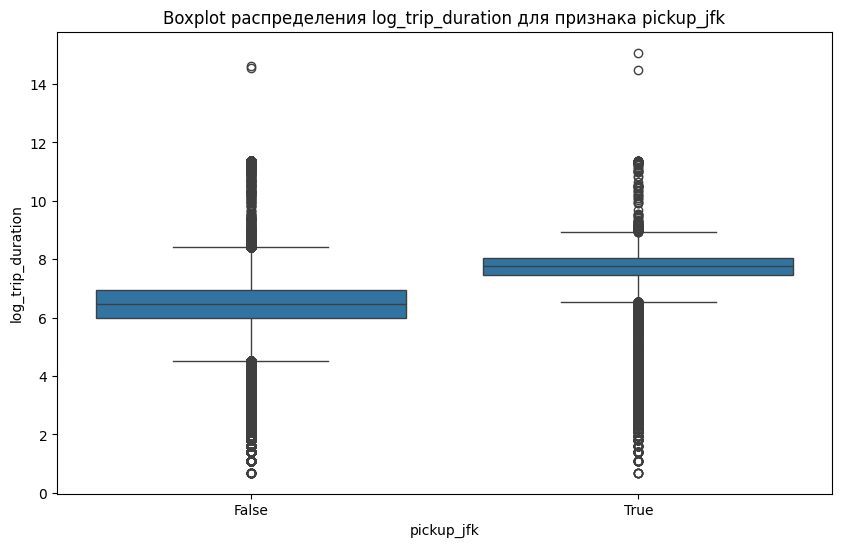

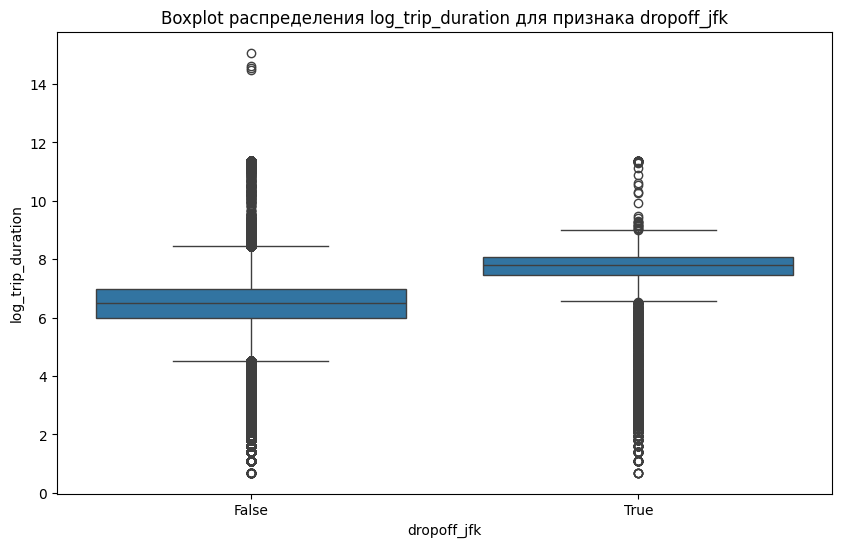

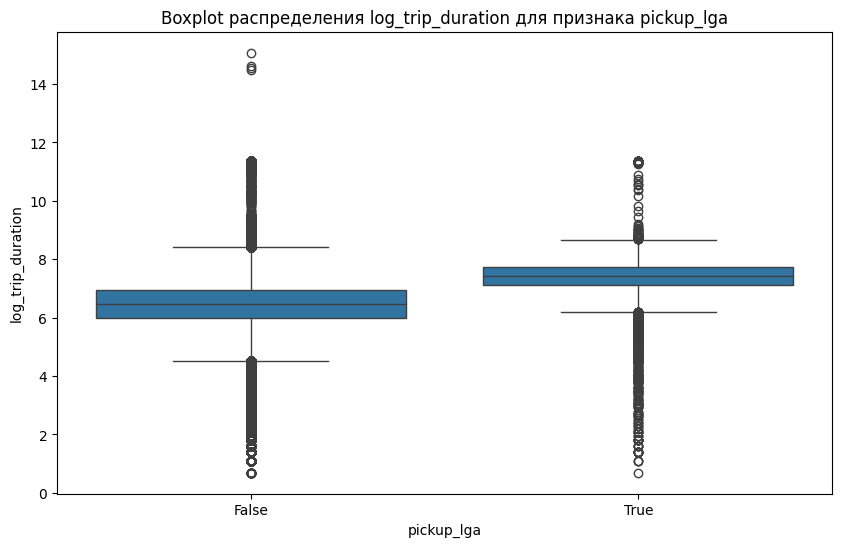

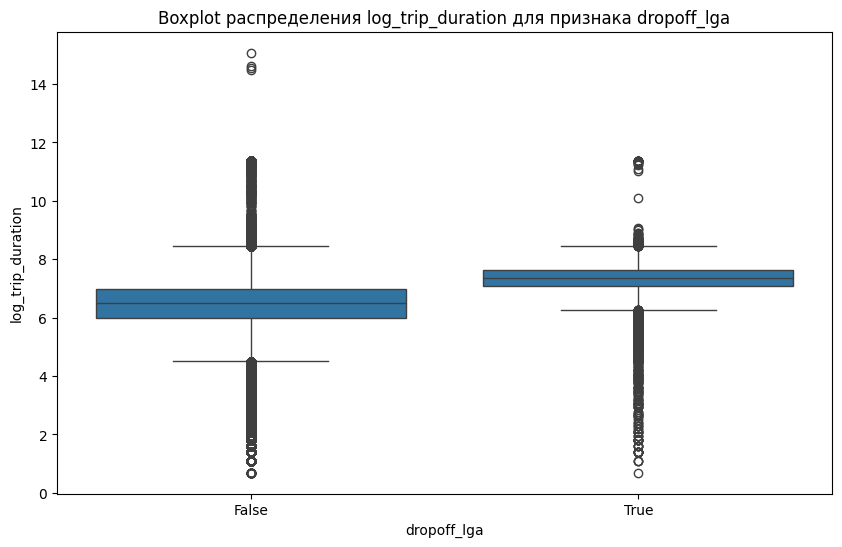

In [31]:
features = ["pickup_jfk", "dropoff_jfk", "pickup_lga", "dropoff_lga"]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data.to_pandas(), x=feature, y="log_trip_duration")
    plt.title(f"Boxplot распределения log_trip_duration для признака {feature}")
    plt.xlabel(feature)
    plt.ylabel("log_trip_duration")
    plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Проанализировав boxplot-графики можно утверждать что для поездок, начинающихся или заканчивающихся в аэропорту Кеннеди и аэропорту Ла Гуардиа, медиана логарифма времени поездки выше, чем для остальных поездок. Это объясняется большим расстоянием между аэропортами и другими районами Нью-Йорка. Признаки показывают полезную информацию, так как помогают выделить поездки, где длительность более высокая из-за значительного расстояния.

Таким образом, данные признаки имеют смысл и добавляют полезную информацию к данным. Они показывают, что если поездка начинается или заканчивается в одном из крупных аэропортов, то среднее время поездки (и его логарифм) будет выше. Эти признаки могут помочь модели лучше предсказывать длительные поездки.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lat_min, lat_max, lon_min, lon_max, n_rows=4, n_cols=4):
        self.lat_min = lat_min
        self.lat_max = lat_max
        self.lon_min = lon_min
        self.lon_max = lon_max
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_step = (lat_max - lat_min) / n_rows
        self.lon_step = (lon_max - lon_min) / n_cols

    def show_map(self):
        lat_centers = np.linspace(self.lat_min + self.lat_step / 2, self.lat_max - self.lat_step / 2, self.n_rows)
        lon_centers = np.linspace(self.lon_min + self.lon_step / 2, self.lon_max - self.lon_step / 2, self.n_cols)
        map_center = [(self.lat_min + self.lat_max) / 2, (self.lon_min + self.lon_max) / 2]
        m = folium.Map(location=map_center, zoom_start=12)
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                lat_start = self.lat_min + i * self.lat_step
                lat_end = lat_start + self.lat_step
                lon_start = self.lon_min + j * self.lon_step
                lon_end = lon_start + self.lon_step

                folium.Rectangle(
                    bounds=[[lat_start, lon_start], [lat_end, lon_end]],
                    color="red",
                    fill=True,
                    fill_opacity=0.1
                ).add_to(m)

        return m

    def fit(self, x=None, y=None):
        return self

    def transform(self, x, y=None):
        pickup_lat_idx = ((x[:, 0] - self.lat_min) // self.lat_step).astype(int)
        pickup_lon_idx = ((x[:, 1] - self.lon_min) // self.lon_step).astype(int)
        dropoff_lat_idx = ((x[:, 2] - self.lat_min) // self.lat_step).astype(int)
        dropoff_lon_idx = ((x[:, 3] - self.lon_min) // self.lon_step).astype(int)

        pickup_cell = pickup_lat_idx * self.n_cols + pickup_lon_idx
        dropoff_cell = dropoff_lat_idx * self.n_cols + dropoff_lon_idx

        pickup_cell[(pickup_lat_idx < 0) | (pickup_lat_idx >= self.n_rows) |
                    (pickup_lon_idx < 0) | (pickup_lon_idx >= self.n_cols)] = -1
        dropoff_cell[(dropoff_lat_idx < 0) | (dropoff_lat_idx >= self.n_rows) |
                     (dropoff_lon_idx < 0) | (dropoff_lon_idx >= self.n_cols)] = -1

        return np.column_stack([pickup_cell, dropoff_cell])



lat_min, lat_max = 40.698, 40.81
lon_min, lon_max = -74.024, -73.937
n_rows, n_cols = 10, 10

transformer = MapGridTransformer(lat_min, lat_max, lon_min, lon_max, n_rows, n_cols)
transformer.fit()
transformed_data = transformer.transform(train_data[["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]].to_numpy())
pickup_cells = transformed_data[:, 0]
dropoff_cells = transformed_data[:, 1]

train_data = train_data.with_columns([
    pl.Series("pickup_cell", pickup_cells),
    pl.Series("dropoff_cell", dropoff_cells)
])

print(train_data.select(["pickup_cell", "dropoff_cell"]))

map_with_grid = transformer.show_map()
map_with_grid

shape: (1_458_644, 2)
┌─────────────┬──────────────┐
│ pickup_cell ┆ dropoff_cell │
│ ---         ┆ ---          │
│ i64         ┆ i64          │
╞═════════════╪══════════════╡
│ 64          ┆ 66           │
│ 35          ┆ 22           │
│ 55          ┆ 12           │
│ 11          ┆ 1            │
│ 85          ┆ 75           │
│ …           ┆ …            │
│ 44          ┆ 33           │
│ 42          ┆ 86           │
│ 67          ┆ 2            │
│ 44          ┆ 55           │
│ 75          ┆ 85           │
└─────────────┴──────────────┘


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [33]:
train, test = train_test_split(
    train_data, test_size=0.3, random_state=10
)

categorical_features = [
    'weekday', 'month', 'hour', 'day_of_year',
    'anomal_period_1', 'anomal_period_2',
    'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga',
    'pickup_cell', 'dropoff_cell', 'max_traffic', 'min_traffic'
]
numeric_features = ['haversine', 'log_haversine']

x_train = train[categorical_features + numeric_features]
y_train = train['log_trip_duration']
x_test = test[categorical_features + numeric_features]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('encode_categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(x_train, y_train)

y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

rmsle_train = calculate_rmsle(y_train, y_pred_train)
rmsle_test = calculate_rmsle(y_test, y_pred_test)

print("RMSLE на обучающей выборке:", rmsle_train)
print("RMSLE на тестовой выборке:", rmsle_test)

RMSLE на обучающей выборке: 0.464611568276874
RMSLE на тестовой выборке: 0.4623814193360764


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.




Почему эти признаки могут быть полезны:

vendor_id: этот признак указывает на поставщика услуги такси. Разные поставщики могут иметь различия в условиях поездок, таких как время подачи автомобиля, обслуживание в аэропортах, наличие скидок или алгоритмы распределения заказов. Это может повлиять на длительность поездки и, следовательно, на целевую переменную.

passenger_count: количество пассажиров может косвенно влиять на продолжительность поездки. Например, такси с несколькими пассажирами могут делать остановки, чтобы высадить людей, или ехать медленнее, чтобы учитывать комфорт. Также, если количество пассажиров больше, такси, возможно, будет выбирать другие маршруты, чтобы оптимально разместить людей в автомобиле.

store_and_fwd_flag: этот флаг указывает на то, что данные о поездке временно сохраняются и отправляются позже (например, когда соединение с сетью восстановлено). Если поездка помечена как сохраненная, это может указывать на её специфику, например, длинные поездки или поездки в удалённые районы, где временно отсутствует связь, что также может повлиять на длительность поездки.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [34]:
unique_vendor_id = train_data.select(pl.col('vendor_id').unique().count()).to_numpy()[0][0]
unique_passenger_count = train_data.select(pl.col('passenger_count').unique().count()).to_numpy()[0][0]
unique_store_and_fwd_flag = train_data.select(pl.col('store_and_fwd_flag').unique().count()).to_numpy()[0][0]

print("Уникальные значения в vendor_id:", unique_vendor_id)
print("Уникальные значения в passenger_count:", unique_passenger_count)
print("Уникальные значения в store_and_fwd_flag:", unique_store_and_fwd_flag)

Уникальные значения в vendor_id: 2
Уникальные значения в passenger_count: 10
Уникальные значения в store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

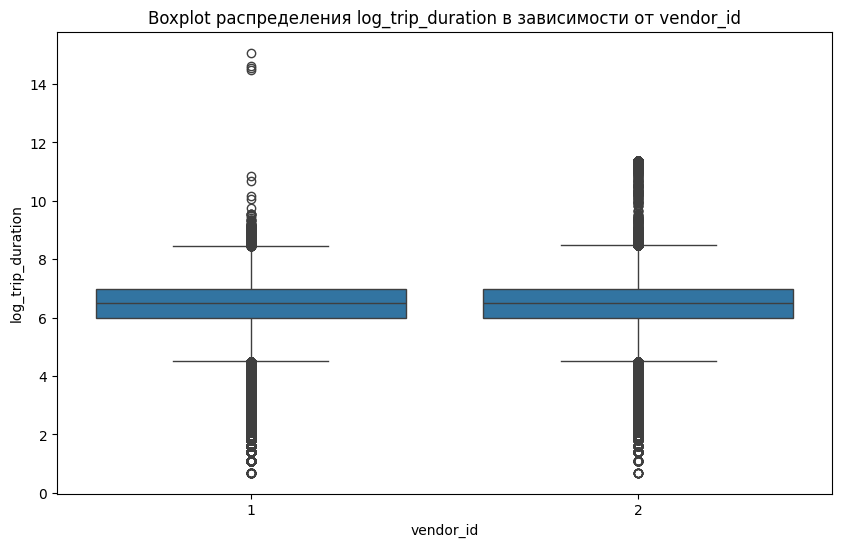

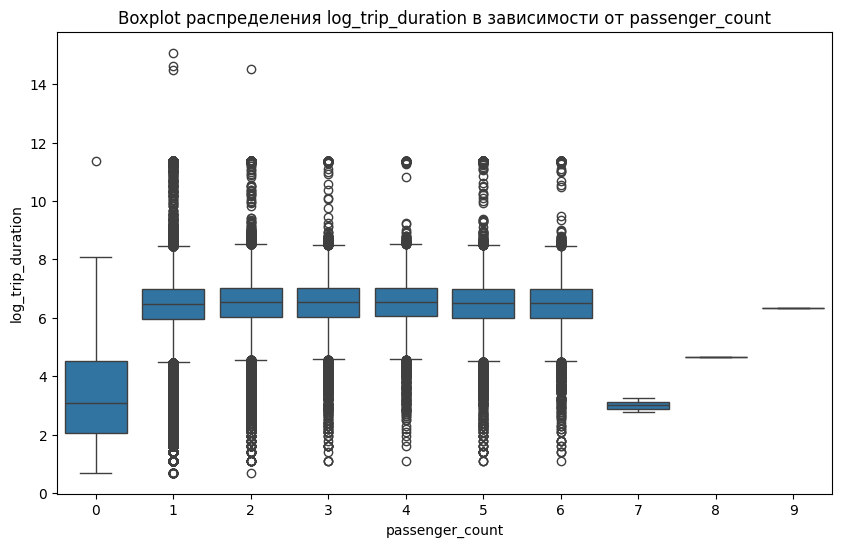

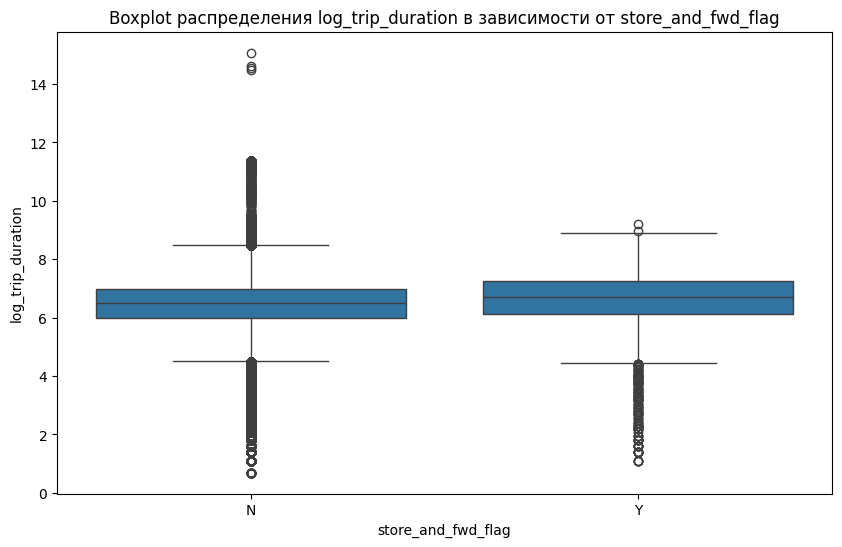

In [35]:
features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data.to_pandas(), x=feature, y="log_trip_duration")
    plt.title(f"Boxplot распределения log_trip_duration в зависимости от {feature}")
    plt.xlabel(feature)
    plt.ylabel("log_trip_duration")
    plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [36]:
train_data = train_data.with_columns(
    (pl.col("vendor_id") - 1).alias("vendor_id_binary")
)

train_data = train_data.with_columns(
    (pl.col("store_and_fwd_flag") == "Y").cast(pl.Int64).alias("store_and_fwd_flag_binary")
)

print(train_data.select(["vendor_id_binary", "store_and_fwd_flag_binary"]))

shape: (1_458_644, 2)
┌──────────────────┬───────────────────────────┐
│ vendor_id_binary ┆ store_and_fwd_flag_binary │
│ ---              ┆ ---                       │
│ i64              ┆ i64                       │
╞══════════════════╪═══════════════════════════╡
│ 1                ┆ 0                         │
│ 0                ┆ 0                         │
│ 1                ┆ 0                         │
│ 1                ┆ 0                         │
│ 1                ┆ 0                         │
│ …                ┆ …                         │
│ 1                ┆ 0                         │
│ 0                ┆ 0                         │
│ 1                ┆ 0                         │
│ 0                ┆ 0                         │
│ 0                ┆ 0                         │
└──────────────────┴───────────────────────────┘


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Основываясь на графиках я думаю что эти признаки не будут сильными, вероятно, за исключением только passenger_count поскольку в больших значениях различия таргета ощутимы однако таких поездок немного. Добавить полезности к модели они не смогут, вероятно.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [37]:
categorical_features = [
    'weekday', 'month', 'hour', 'day_of_year',
    'anomal_period_1', 'anomal_period_2',
    'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga',
    'pickup_cell', 'dropoff_cell', 'max_traffic', 'min_traffic',
    'vendor_id_binary', 'store_and_fwd_flag_binary', 'passenger_count'
]
numeric_features = ['haversine', 'log_haversine']

train, test = train_test_split(train_data, test_size=0.3, random_state=10)

x_train = train[categorical_features + numeric_features]
y_train = train['log_trip_duration']
x_test = test[categorical_features + numeric_features]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(x_train, y_train)

y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

rmsle_train = calculate_rmsle(y_train, y_pred_train)
rmsle_test = calculate_rmsle(y_test, y_pred_test)

print("RMSLE на обучающей выборке:", rmsle_train)
print("RMSLE на тестовой выборке:", rmsle_test)

RMSLE на обучающей выборке: 0.46409796140072057
RMSLE на тестовой выборке: 0.4621317683441318


Чуть чуть улучшили.

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

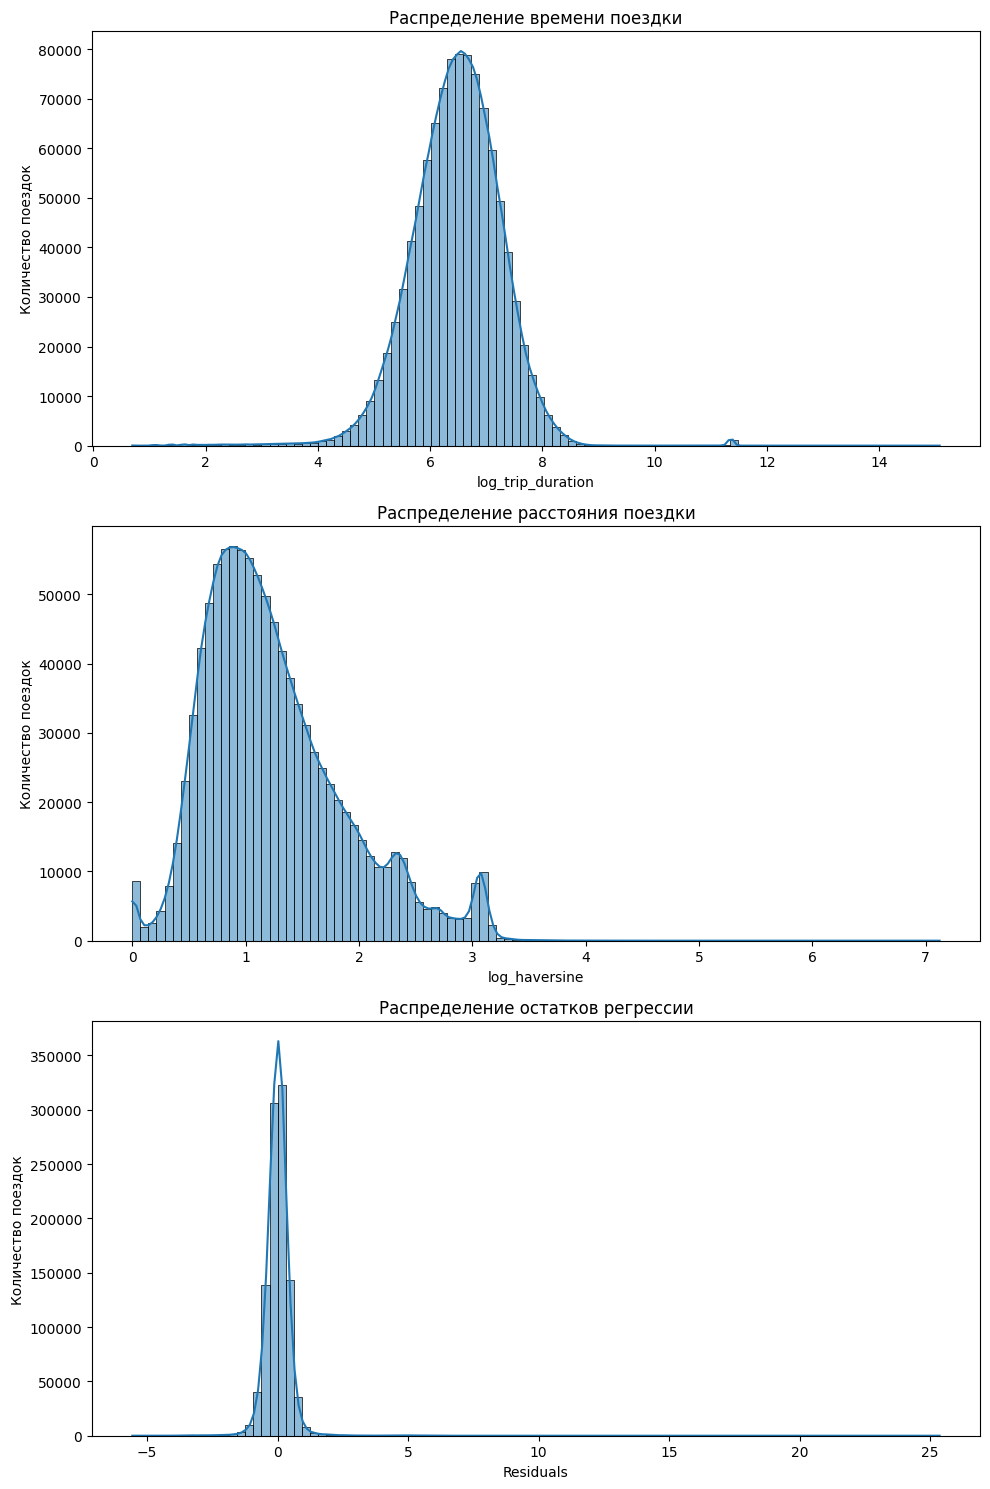

In [38]:
y_pred_train = pipeline.predict(x_train)
residuals = y_train - y_pred_train

fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

sns.histplot(train['log_trip_duration'], bins=100, ax=axes[0], kde=True)
axes[0].set_title('Распределение времени поездки')
axes[0].set_xlabel('log_trip_duration')
axes[0].set_ylabel('Количество поездок')

sns.histplot(train['log_haversine'], bins=100, ax=axes[1], kde=True)
axes[1].set_title('Распределение расстояния поездки')
axes[1].set_xlabel('log_haversine')
axes[1].set_ylabel('Количество поездок')

sns.histplot(residuals, bins=100, ax=axes[2], kde=True)
axes[2].set_title('Распределение остатков регрессии')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Количество поездок')

plt.tight_layout()
plt.show()

In [39]:
train = train.with_columns([
    pl.Series("residuals", residuals)
])

filtered_train = train.filter(
    (pl.col("log_trip_duration") >= 2) & (pl.col("log_trip_duration") <= 12) &
    (pl.col("log_haversine") < 4) &
    (pl.col("residuals").abs() < 3)
)

initial_size = train.shape[0]
filtered_size = filtered_train.shape[0]
print("Изначальный размер обучающей выборки:", initial_size)
print("Размер после удаления выбросов:", filtered_size)
print("Число удалённых объектов:", initial_size - filtered_size)

Изначальный размер обучающей выборки: 1021050
Размер после удаления выбросов: 1018344
Число удалённых объектов: 2706


In [40]:
x_train_filtered = filtered_train[categorical_features + numeric_features]
y_train_filtered = filtered_train['log_trip_duration']

pipeline.fit(x_train_filtered, y_train_filtered)

y_pred_train_filtered = pipeline.predict(x_train_filtered)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

rmsle_train_filtered = calculate_rmsle(y_train_filtered, y_pred_train_filtered)
rmsle_test = calculate_rmsle(y_test, y_pred_test)

print("RMSLE на очищенной обучающей выборке:", rmsle_train_filtered)
print("RMSLE на тестовой выборке:", rmsle_test)

RMSLE на очищенной обучающей выборке: 0.40881074762486463
RMSLE на тестовой выборке: 0.46446632901975227


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [41]:
train_data = train_data.with_columns(
    pl.col("passenger_count").cast(pl.Int32)
)

passenger_count_threshold = 4
cell_trip_threshold = 50

filtered_train = filtered_train.with_columns(
    pl.when(pl.col("passenger_count") > passenger_count_threshold)
    .then(passenger_count_threshold)
    .otherwise(pl.col("passenger_count"))
    .alias("passenger_count")
)

cell_trip_counts = filtered_train.group_by("pickup_cell").count().filter(pl.col("count") < cell_trip_threshold)
rare_cells = cell_trip_counts.select("pickup_cell").to_series().to_list()

filtered_train = filtered_train.with_columns([
    pl.when(pl.col("pickup_cell").is_in(rare_cells)).then(-1).otherwise(pl.col("pickup_cell")).alias("pickup_cell"),
    pl.when(pl.col("dropoff_cell").is_in(rare_cells)).then(-1).otherwise(pl.col("dropoff_cell")).alias("dropoff_cell")
])

test = test.with_columns(
    pl.when(pl.col("passenger_count") > passenger_count_threshold)
    .then(passenger_count_threshold)
    .otherwise(pl.col("passenger_count"))
    .alias("passenger_count")
)

cell_trip_counts = test.group_by("pickup_cell").count().filter(pl.col("count") < cell_trip_threshold)
rare_cells = cell_trip_counts.select("pickup_cell").to_series().to_list()

test = test.with_columns([
    pl.when(pl.col("pickup_cell").is_in(rare_cells)).then(-1).otherwise(pl.col("pickup_cell")).alias("pickup_cell"),
    pl.when(pl.col("dropoff_cell").is_in(rare_cells)).then(-1).otherwise(pl.col("dropoff_cell")).alias("dropoff_cell")
])

print(filtered_train.select(["passenger_count", "pickup_cell", "dropoff_cell"]))

shape: (1_018_344, 3)
┌─────────────────┬─────────────┬──────────────┐
│ passenger_count ┆ pickup_cell ┆ dropoff_cell │
│ ---             ┆ ---         ┆ ---          │
│ i64             ┆ i64         ┆ i64          │
╞═════════════════╪═════════════╪══════════════╡
│ 3               ┆ 33          ┆ 14           │
│ 1               ┆ 33          ┆ 75           │
│ 2               ┆ 45          ┆ -1           │
│ 1               ┆ 74          ┆ 55           │
│ 1               ┆ 55          ┆ 56           │
│ …               ┆ …           ┆ …            │
│ 1               ┆ 43          ┆ 53           │
│ 1               ┆ 23          ┆ 43           │
│ 1               ┆ 77          ┆ 67           │
│ 1               ┆ 96          ┆ -1           │
│ 1               ┆ 2           ┆ 11           │
└─────────────────┴─────────────┴──────────────┘


<ipython-input-41-5b7664f17ef1>:15: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  cell_trip_counts = filtered_train.group_by("pickup_cell").count().filter(pl.col("count") < cell_trip_threshold)
<ipython-input-41-5b7664f17ef1>:30: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  cell_trip_counts = test.group_by("pickup_cell").count().filter(pl.col("count") < cell_trip_threshold)


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [42]:
x_train = filtered_train[categorical_features + numeric_features]
y_train = filtered_train['log_trip_duration']
x_test = test[categorical_features + numeric_features]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(x_train, y_train)

y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

rmsle_train = calculate_rmsle(y_train, y_pred_train)
rmsle_test = calculate_rmsle(y_test, y_pred_test)

print("RMSLE на обучающей выборке:", rmsle_train)
print("RMSLE на тестовой выборке:", rmsle_test)

RMSLE на обучающей выборке: 0.40888738644260386
RMSLE на тестовой выборке: 0.46455741741170453


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [43]:
categorical_features = [
    'weekday', 'month', 'hour', 'day_of_year',
    'anomal_period_1', 'anomal_period_2',
    'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga',
    'pickup_cell', 'dropoff_cell', 'max_traffic', 'min_traffic',
    'vendor_id_binary', 'store_and_fwd_flag_binary', 'passenger_count'
]
numeric_features = ['haversine', 'log_haversine']

initial_feature_count = len(categorical_features) + len(numeric_features)
print("Количество признаков до кодирования:", initial_feature_count)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

x_train_encoded = preprocessor.fit_transform(train_data.to_pandas()[categorical_features + numeric_features])
encoded_feature_count = x_train_encoded.shape[1]
print("Количество признаков после кодирования:", encoded_feature_count)

Количество признаков до кодирования: 19
Количество признаков после кодирования: 443


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [44]:
from sklearn.linear_model import Lasso

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

lasso_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Lasso())
])

lasso_pipeline.fit(x_train, y_train)

y_pred_train_lasso = lasso_pipeline.predict(x_train)
y_pred_test_lasso = lasso_pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

rmsle_train_lasso = calculate_rmsle(y_train, y_pred_train_lasso)
rmsle_test_lasso = calculate_rmsle(y_test, y_pred_test_lasso)

print("RMSLE на обучающей выборке (Ridge):", rmsle_train)
print("RMSLE на тестовой выборке (Ridge):", rmsle_test)

print("RMSLE на обучающей выборке (Lasso):", rmsle_train_lasso)
print("RMSLE на тестовой выборке (Lasso):", rmsle_test_lasso)

RMSLE на обучающей выборке (Ridge): 0.40888738644260386
RMSLE на тестовой выборке (Ridge): 0.46455741741170453
RMSLE на обучающей выборке (Lasso): 0.7600990104639003
RMSLE на тестовой выборке (Lasso): 0.7942949589027732


Очевидно что метод Ridge лучше Lasso если мы используем стоковую альфу.

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [45]:
train_sub, val = train_test_split(filtered_train, test_size=0.2, random_state=10)

x_train_sub = train_sub[categorical_features + numeric_features]
y_train_sub = train_sub['log_trip_duration']
x_val = val[categorical_features + numeric_features]
y_val = val['log_trip_duration']

alpha_range = np.logspace(-1, 3, 10)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

best_alpha_ridge = None
best_rmsle_ridge = float('inf')
for alpha in alpha_range:
    ridge_model = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', Ridge(alpha=alpha))
    ])
    ridge_model.fit(x_train_sub, y_train_sub)
    y_pred_val = ridge_model.predict(x_val)
    rmsle_val = calculate_rmsle(y_val, y_pred_val)
    if rmsle_val < best_rmsle_ridge:
        best_rmsle_ridge = rmsle_val
        best_alpha_ridge = alpha

alpha_range = np.logspace(-4, 1, 10)

best_alpha_lasso = None
best_rmsle_lasso = float('inf')
for alpha in alpha_range:
    lasso_model = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', Lasso(alpha=alpha, max_iter=10000))
    ])
    lasso_model.fit(x_train_sub, y_train_sub)
    y_pred_val = lasso_model.predict(x_val)
    rmsle_val = calculate_rmsle(y_val, y_pred_val)
    if rmsle_val < best_rmsle_lasso:
        best_rmsle_lasso = rmsle_val
        best_alpha_lasso = alpha

print("Оптимальное значение альфы для Ridge-регрессии:", best_alpha_ridge)
print("Лучшая RMSLE на валидации:", best_rmsle_ridge)

print("Оптимальное значение альфы для Lasso-регрессии:", best_alpha_lasso)
print("Лучшая RMSLE на валидации:", best_rmsle_lasso)

if best_rmsle_ridge < best_rmsle_lasso:
    best_model = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', Ridge(alpha=best_alpha_ridge))
    ])
    best_model.fit(x_train, y_train)
    y_pred_test = best_model.predict(x_test)
    final_rmsle = calculate_rmsle(y_test, y_pred_test)
    print("Лучшая модель: Ridge-регрессия")
else:
    best_model = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', Lasso(alpha=best_alpha_lasso, max_iter=10000))
    ])
    best_model.fit(x_train, y_train)
    y_pred_test = best_model.predict(x_test)
    final_rmsle = calculate_rmsle(y_test, y_pred_test)
    print("Лучшая модель: Lasso-регрессия")

print("RMSLE на тестовой выборке для лучшей модели:", final_rmsle)

Оптимальное значение альфы для Ridge-регрессии: 0.1
Лучшая RMSLE на валидации: 0.4100541202516462
Оптимальное значение альфы для Lasso-регрессии: 0.0001
Лучшая RMSLE на валидации: 0.4107957386944894
Лучшая модель: Ridge-регрессия
RMSLE на тестовой выборке для лучшей модели: 0.46455997666965315


Сохраните наилучшее значение, как бенчмарк на будущее

In [46]:
best_rmsle = 0.46455997666965315

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [47]:
zero_weights = []
rmsle_values = []

for alpha in alpha_range:
    lasso_model = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', Lasso(alpha=alpha, max_iter=10000))
    ])
    lasso_model.fit(x_train_sub, y_train_sub)
    y_pred_val = lasso_model.predict(x_val)

    rmsle_val = calculate_rmsle(y_val, y_pred_val)
    rmsle_values.append(rmsle_val)

    n_zero_weights = sum(lasso_model.named_steps['regressor'].coef_ == 0)
    zero_weights.append(n_zero_weights)

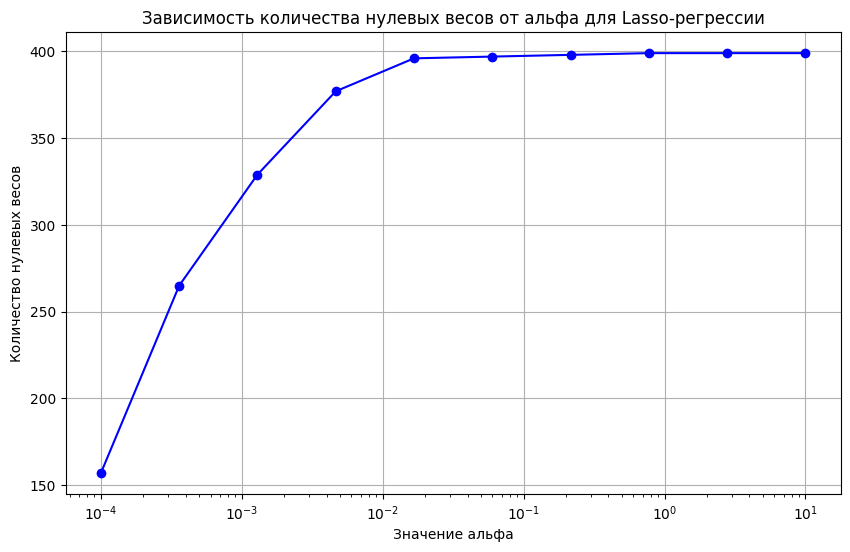

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, zero_weights, marker='o', color='blue')
plt.xscale('log')
plt.xlabel('Значение альфа')
plt.ylabel('Количество нулевых весов')
plt.title('Зависимость количества нулевых весов от альфа для Lasso-регрессии')
plt.grid(True)
plt.show()

In [49]:
initial_feature_count = x_train_sub.shape[1]
target_zero_weights = encoded_feature_count // 2

for alpha, n_zero, rmsle in zip(alpha_range, zero_weights, rmsle_values):
    if n_zero >= target_zero_weights:
        print(f"При альфа = {alpha} модель имеет {n_zero} нулевых весов")
        print("RMSLE на валидации:", rmsle)
        break

При альфа = 0.00035938136638046257 модель имеет 265 нулевых весов
RMSLE на валидации: 0.41355418929587984


In [50]:
print("Как мы видим потеря в точности равна =", rmsle - best_rmsle_lasso)

Как мы видим потеря в точности равна = 0.002758450601390461


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

####Польза нового признака:

Этот признак кодирует популярные маршруты, по которым чаще всего ездят такси. Частота поездок по определенным маршрутам может быть обусловлена специфической географией Манхэттена, уровнем трафика или потребностями пассажиров в конкретных зонах. Это знание может помочь модели в улучшении прогноза длительности поездки, так как по частым маршрутам обычно можно более точно предсказать время.

####Почему линейная модель не "вытащит" эту информацию сама:

Линейные модели обычно работают с признаками по отдельности, что ограничивает их в умении выявлять сложные взаимодействия, такие как пары ячеек.

Признаки «начальная ячейка» и «конечная ячейка» в линейной модели рассматривались бы независимо друг от друга, что не позволит модели учесть популярные маршруты напрямую.
Взаимодействия признаков — то есть использование комбинаций признаков как нового признака — в данном случае позволяет модели учитывать влияние конкретной комбинации (начало и конец маршрута) на таргет, что невозможно с помощью только линейных комбинаций исходных признаков.

Добавив новый признак для популярной пары ячеек, мы предоставляем модели возможность учитывать маршрут целиком, что линейной модели сложно сделать без явного взаимодействия признаков.

In [51]:
filtered_train_pd = filtered_train.to_pandas()
test_pd = test.to_pandas()

filtered_train_pd['pickup_dropoff_pair'] = list(zip(filtered_train_pd['pickup_cell'], filtered_train_pd['dropoff_cell']))
test_pd['pickup_dropoff_pair'] = list(zip(test_pd['pickup_cell'], test_pd['dropoff_cell']))

pair_counts = filtered_train_pd['pickup_dropoff_pair'].value_counts()
top_100_pairs = pair_counts.head(100).index

filtered_train_pd['top_pair_category'] = -1
test_pd['top_pair_category'] = -1

for idx, pair in enumerate(top_100_pairs):
    filtered_train_pd.loc[filtered_train_pd['pickup_dropoff_pair'] == pair, 'top_pair_category'] = idx
    test_pd.loc[test_pd['pickup_dropoff_pair'] == pair, 'top_pair_category'] = idx

filtered_train = pl.from_pandas(filtered_train_pd)
test = pl.from_pandas(test_pd)

print(filtered_train.select(['pickup_cell', 'dropoff_cell', 'top_pair_category']))
print(test.select(['pickup_cell', 'dropoff_cell', 'top_pair_category']))

shape: (1_018_344, 3)
┌─────────────┬──────────────┬───────────────────┐
│ pickup_cell ┆ dropoff_cell ┆ top_pair_category │
│ ---         ┆ ---          ┆ ---               │
│ i64         ┆ i64          ┆ i64               │
╞═════════════╪══════════════╪═══════════════════╡
│ 33          ┆ 14           ┆ -1                │
│ 33          ┆ 75           ┆ -1                │
│ 45          ┆ -1           ┆ 11                │
│ 74          ┆ 55           ┆ -1                │
│ 55          ┆ 56           ┆ 27                │
│ …           ┆ …            ┆ …                 │
│ 43          ┆ 53           ┆ 67                │
│ 23          ┆ 43           ┆ -1                │
│ 77          ┆ 67           ┆ 48                │
│ 96          ┆ -1           ┆ -1                │
│ 2           ┆ 11           ┆ -1                │
└─────────────┴──────────────┴───────────────────┘
shape: (437_594, 3)
┌─────────────┬──────────────┬───────────────────┐
│ pickup_cell ┆ dropoff_cell ┆ top_pair_

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [52]:
categorical_features = [
    'weekday', 'month', 'hour', 'day_of_year',
    'anomal_period_1', 'anomal_period_2',
    'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga',
    'pickup_cell', 'dropoff_cell', 'max_traffic', 'min_traffic',
    'vendor_id_binary', 'store_and_fwd_flag_binary', 'passenger_count',
    'top_pair_category'
]
numeric_features = ['haversine', 'log_haversine']

x_train = filtered_train[categorical_features + numeric_features]
y_train = filtered_train['log_trip_duration']
x_test = test[categorical_features + numeric_features]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=best_alpha_ridge))
])

pipeline.fit(x_train, y_train)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

final_rmsle = calculate_rmsle(y_test, y_pred_test)
print("RMSLE на тестовой выборке для модели с новым признаком:", final_rmsle)

RMSLE на тестовой выборке для модели с новым признаком: 0.45958311007306396


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Манхэттенское расстояние — это мера расстояния между двумя точками в сетке, предполагающая только горизонтальные и вертикальные перемещения (без диагоналей). Оно определяется как сумма абсолютных разностей их координат:

$$
D_{\text{Manhattan}} = |x_2 - x_1| + |y_2 - y_1|
$$

Этот метод получил название "Манхэттенское расстояние", так как напоминает движение по улицам Манхэттена, где улицы образуют сетку, и для перемещения из одной точки в другую необходимо двигаться вдоль этой сетки. В отличие от евклидова расстояния, которое измеряет кратчайшую прямую между двумя точками, манхэттенское расстояние точнее отражает фактическое расстояние в условиях прямоугольной городской планировки, как в Манхэттене.

####Применение в задаче:
 Поскольку структура улиц Манхэттена имеет четко выраженную сеточную планировку, добавление манхэттенского расстояния в качестве признака может улучшить нашу модель. Этот признак лучше соответствует реальному маршруту, по которому движется такси, чем евклидовое расстояние.


In [58]:
import math

filtered_train_pd = filtered_train.to_pandas()
test_pd = test.to_pandas()

angle = np.radians(29)
cos_angle, sin_angle = np.cos(angle), np.sin(angle)

earth_radius_km = 6371

def rotate_coordinates(lat, lon):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    avg_lat = np.radians(lat.mean())
    x = (lon_rad - lon_rad.mean()) * np.cos(avg_lat) * earth_radius_km
    y = (lat_rad - lat_rad.mean()) * earth_radius_km
    x_new = x * cos_angle + y * sin_angle
    y_new = -x * sin_angle + y * cos_angle
    return np.column_stack((x_new, y_new))

filtered_train_pd[['pickup_x', 'pickup_y']] = rotate_coordinates(
    filtered_train_pd['pickup_latitude'], filtered_train_pd['pickup_longitude']
)
filtered_train_pd[['dropoff_x', 'dropoff_y']] = rotate_coordinates(
    filtered_train_pd['dropoff_latitude'], filtered_train_pd['dropoff_longitude']
)


test_pd[['pickup_x', 'pickup_y']] = rotate_coordinates(
    test_pd['pickup_latitude'], test_pd['pickup_longitude']
)
test_pd[['dropoff_x', 'dropoff_y']] = rotate_coordinates(
    test_pd['dropoff_latitude'], test_pd['dropoff_longitude']
)

filtered_train_pd['manhattan_distance'] = (
    np.abs(filtered_train_pd['pickup_x'] - filtered_train_pd['dropoff_x']) +
    np.abs(filtered_train_pd['pickup_y'] - filtered_train_pd['dropoff_y'])
)
filtered_train_pd['log_manhattan_distance'] = np.log1p(filtered_train_pd['manhattan_distance'])

test_pd['manhattan_distance'] = (
    np.abs(test_pd['pickup_x'] - test_pd['dropoff_x']) +
    np.abs(test_pd['pickup_y'] - test_pd['dropoff_y'])
)
test_pd['log_manhattan_distance'] = np.log1p(test_pd['manhattan_distance'])

filtered_train = pl.from_pandas(filtered_train_pd)
test = pl.from_pandas(test_pd)

log_manhattan_corr = filtered_train.select(pl.corr("log_manhattan_distance", "log_trip_duration"))
log_haversine_corr = filtered_train.select(pl.corr("log_haversine", "log_trip_duration"))

print(f"Корреляция между log_manhattan_distance и log_trip_duration (train): {log_manhattan_corr}")
print(f"Корреляция между log_haversine и log_trip_duration (train): {log_haversine_corr}")

Корреляция между log_manhattan_distance и log_trip_duration (train): shape: (1, 1)
┌────────────────────────┐
│ log_manhattan_distance │
│ ---                    │
│ f64                    │
╞════════════════════════╡
│ 0.767903               │
└────────────────────────┘
Корреляция между log_haversine и log_trip_duration (train): shape: (1, 1)
┌───────────────┐
│ log_haversine │
│ ---           │
│ f64           │
╞═══════════════╡
│ 0.775721      │
└───────────────┘


Корреляция log_haversine чуть больше что указывает на то что обычное расстояние хороший признак, и манхэттенское расстояние ему даже уступает.

In [59]:
center_lat, center_lon = 40.7580, -73.9855

rotation_angle = np.radians(29)

m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

def rotate_line(lat, lon, length_km, angle_rad):
    d_lat = (length_km / 111.32) * np.cos(angle_rad)
    d_lon = (length_km / (111.32 * np.cos(np.radians(lat)))) * np.sin(angle_rad)
    return [(lat - d_lat, lon - d_lon), (lat + d_lat, lon + d_lon)]

vert_line = rotate_line(center_lat, center_lon, 10, rotation_angle)
folium.PolyLine(vert_line, color="red", weight=3).add_to(m)

horz_line = rotate_line(center_lat, center_lon, 10, rotation_angle + math.pi / 2)
folium.PolyLine(horz_line, color="red", weight=3).add_to(m)

m

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [60]:
categorical_features = [
    'weekday', 'month', 'hour', 'day_of_year',
    'anomal_period_1', 'anomal_period_2',
    'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga',
    'pickup_cell', 'dropoff_cell', 'max_traffic', 'min_traffic',
    'vendor_id_binary', 'store_and_fwd_flag_binary', 'passenger_count',
    'top_pair_category'
]
numeric_features = ['haversine', 'log_haversine', 'manhattan_distance', 'log_manhattan_distance']

x_train = filtered_train[categorical_features + numeric_features]
y_train = filtered_train['log_trip_duration']
x_test = test[categorical_features + numeric_features]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=best_alpha_ridge))
])

pipeline.fit(x_train, y_train)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

final_rmsle = calculate_rmsle(y_test, y_pred_test)
print("RMSLE на тестовой выборке для модели с новым признаком:", final_rmsle)

RMSLE на тестовой выборке для модели с новым признаком: 0.45834197063620985


Стало чуть чуть лучше потому что появились новые числовые признаки.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [121]:
def create_features(data):

    data = data.with_columns(
        pl.when(pl.col("haversine") < 2)
          .then(1).otherwise(0).alias("short_trip")
    )

    data = data.with_columns(
        (pl.col("haversine") ** 0.5).alias("sqrt_distance")
    )

    return data

filtered_train = create_features(filtered_train)
test = create_features(test)

categorical_features = [
    'weekday', 'month', 'hour', 'day_of_year',
    'anomal_period_1', 'anomal_period_2',
    'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga',
    'pickup_cell', 'dropoff_cell', 'max_traffic', 'min_traffic',
    'vendor_id_binary', 'store_and_fwd_flag_binary', 'passenger_count',
    'top_pair_category', 'short_trip'
]
numeric_features = ['haversine', 'log_haversine', 'manhattan_distance', 'log_manhattan_distance', 'sqrt_distance']

x_train = filtered_train[categorical_features + numeric_features]
y_train = filtered_train['log_trip_duration']
x_test = test[categorical_features + numeric_features]
y_test = test['log_trip_duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=best_alpha_ridge))
])

pipeline.fit(x_train, y_train)
y_pred_test = pipeline.predict(x_test)

def calculate_rmsle(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

final_rmsle = calculate_rmsle(y_test, y_pred_test)
print("RMSLE на тестовой выборке для модели с новым признаком:", final_rmsle)

RMSLE на тестовой выборке для модели с новым признаком: 0.4531927642266391


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

Я, каждый раз когда гугл коллаб решает перезапуститься после 14 таски: https://youtu.be/PqNrOKa6mzU?si=pwrOT4r15eDbiXjT